# Support Vector Regression

## Importing the necessary Libraries and Packages

In [16]:
from sklearn.model_selection import train_test_split  # splitting the dataset
from sklearn.svm import SVR  # regression algorithm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error  # accuracy metrics
from joblib import dump  # saving the model
import numpy as np  # data processing
import pandas as pd  # data processing
import matplotlib.pyplot as plt  # data plotting

## Importing the csv file as a DataFrame

In [17]:
df = pd.read_csv('Point_Values.csv')
df.head()

,Points,Values
0,-10.0,-1358
1,-9.5,-1200
2,-9.0,-1000
3,-8.5,-850
4,-8.0,-734


## Exploratory Data Analysis

Formal information about the dataset


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Points  41 non-null     float64
 1   Values  41 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 784.0 bytes


Description of the dataset


In [19]:
df.describe()

,Points,Values
count,41.000000,41.000000
mean,0.000000,0.000000
std,5.989574,573.598858
min,-10.000000,-1358.000000
25%,-5.000000,-203.000000
50%,0.000000,0.000000
75%,5.000000,203.000000
max,10.000000,1358.000000


Checking if any null value exists


In [20]:
df.isnull().sum()

Points    0
Values    0
dtype: int64

Columns of the dataset


In [21]:
df.columns

Index(['Points', 'Values'], dtype='object')

Correlations between the variables


In [22]:
df.corr()

,Points,Values
Points,1.000000,0.926989
Values,0.926989,1.000000


## Now taking 2 parts from the dataset
### X : which contains only the <b>Points</b> column<br>y : which contains only the <b>Values</b> column 

In [23]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Visualization of the data

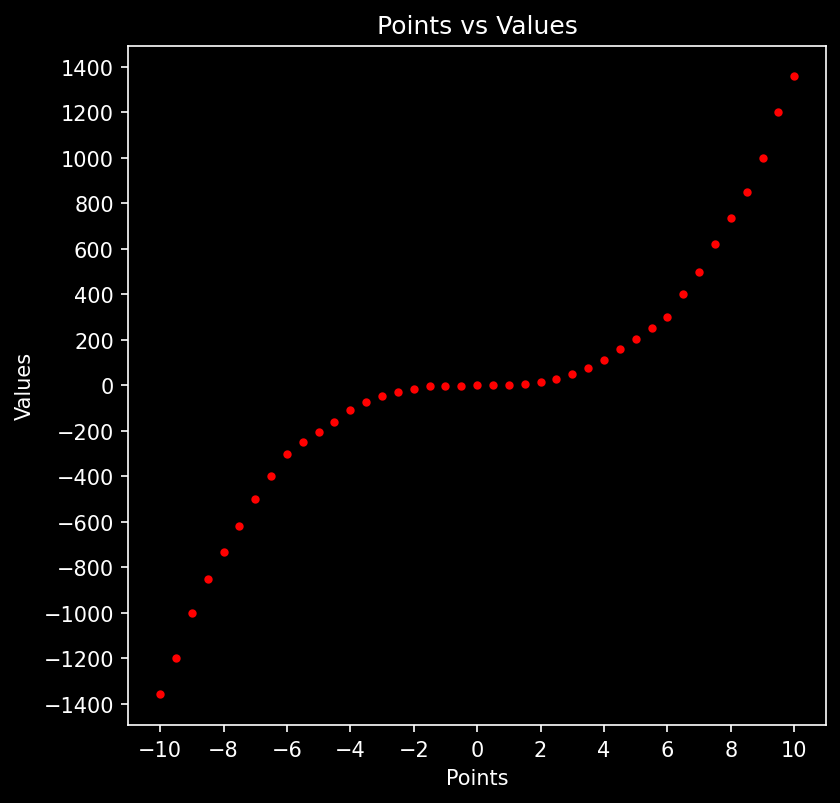

In [24]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
Points = df['Points']
Values = df['Values']
plt.scatter(Points, Values, marker='.', color='red')
plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.arange(-1400, 1500, 200))
plt.title('Points vs Values')
plt.xlabel('Points')
plt.ylabel('Values')
plt.savefig('Images/Points_vs_Values.png', bbox_inches='tight')

## Split the <b>X</b> and <b>y</b> Dataframes for Test and Training

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Implementation of the Model

In [26]:
svr = SVR(kernel='poly', C=10, gamma=0.5)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

## Performance of the Model

In [27]:
print('The coefficient of determination :', r2_score(y_test, y_pred))
adjusted_r2_score = 1-((1-r2_score(y_test, y_pred))*(len(y_test)-1))/(len(y_test)-X_test.shape[1]-1)
print('The adjusted coefficient of determination :', adjusted_r2_score)

The coefficient of determination : 0.9962292231682769
The adjusted coefficient of determination : 0.9949722975577026


## Plotting the Regression

### Training Dataset

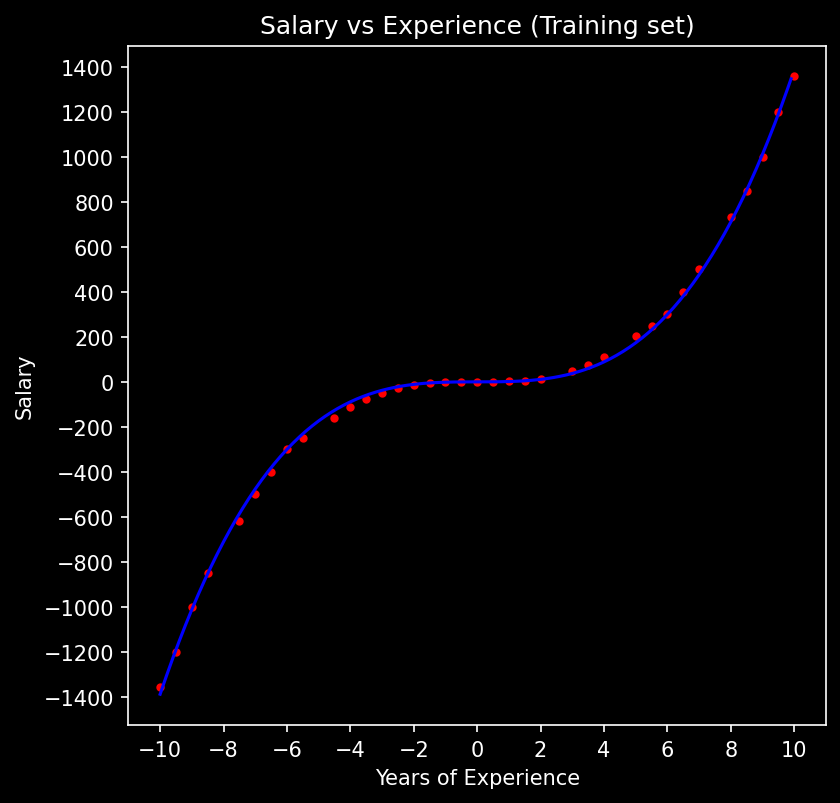

In [28]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
X_train_grid = np.arange(min(X_train), max(X_train), 0.1)
X_train_grid = X_train_grid.reshape((len(X_train_grid), 1))
plt.scatter(X_train, y_train, marker='.', color='red')
plt.plot(X_train_grid, svr.predict(X_train_grid), color='blue')
plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.arange(-1400, 1500, 200))
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.savefig('Images/Training_set.png', bbox_inches='tight')

### Test Dataset

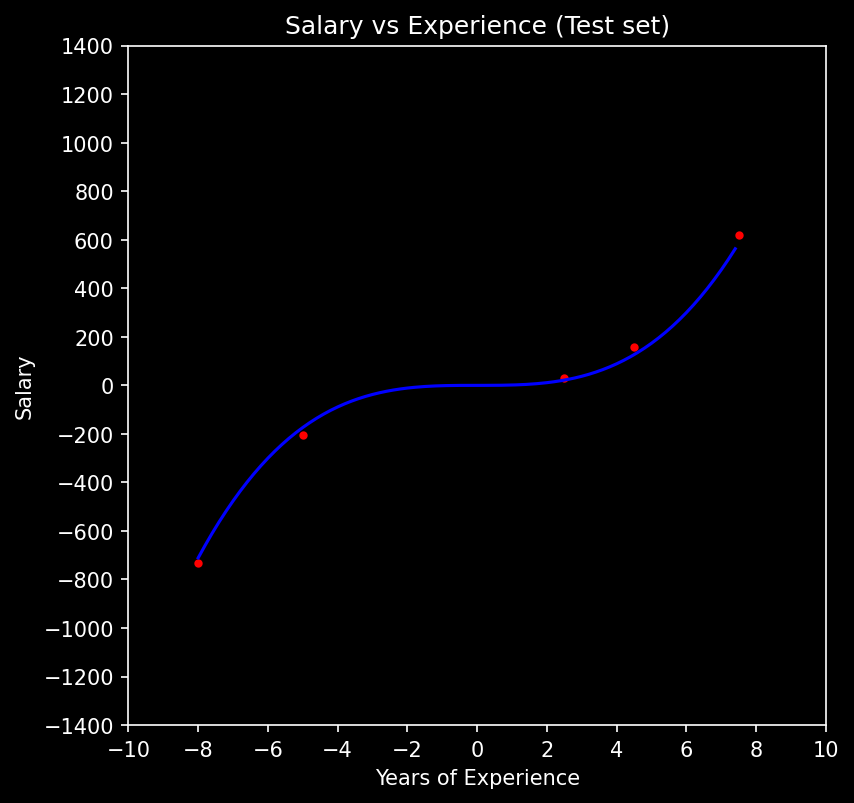

In [29]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
X_test_grid = np.arange(min(X_test), max(X_test), 0.1)
X_test_grid = X_test_grid.reshape((len(X_test_grid), 1))
plt.scatter(X_test, y_test, marker='.', color='red')
plt.plot(X_test_grid, svr.predict(X_test_grid), color='blue')
plt.xticks(np.arange(-10, 11, 2))
plt.yticks(np.arange(-1400, 1500, 200))
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.savefig('Images/Test_set.png', bbox_inches='tight')

## Additional Performance Metrics

In [30]:
print('Mean Absolute Error (MAE) :', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE) :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE) :', mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE) :', mean_absolute_percentage_error(y_test, y_pred))

Mean Absolute Error (MAE) : 25.43527777778047
Mean Squared Error (MSE) : 744.7504456020049
Root Mean Squared Error (RMSE) : 27.290116262156246
Mean Absolute Percentage Error (MAPE) : 0.1390324951805944


## Saving the Model

In [31]:
dump(svr, 'supportVectorRegressor.joblib')

['supportVectorRegressor.joblib']